In [ ]:
Name - Dhangar Sumedh Dilip
Class - BE Artificial Intelligence and Data Science.
Roll No - 15
Title -  Implement Agglomerative hierarchical clustering algorithm using Customer Data. 

In [1]:
# Step No.1 - Load the Customer Personality Analysis Dataset.

In [2]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv(r"C:\Users\saira\Downloads\Customer Data.csv")

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
# Step No.2 -  Preprocess the Data.

In [12]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [13]:
df.fillna(0, inplace=True)


In [14]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [16]:
df = pd.get_dummies(df, drop_first=True)


In [21]:
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Dt_Customer_9/4/2014,Dt_Customer_9/5/2013,Dt_Customer_9/5/2014,Dt_Customer_9/6/2013,Dt_Customer_9/6/2014,Dt_Customer_9/7/2013,Dt_Customer_9/8/2012,Dt_Customer_9/8/2013,Dt_Customer_9/9/2012,Dt_Customer_9/9/2013
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,False,False,False,False,False,False,False,False,False,False
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,False,False,False,False,False,False,False,False,False,False
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,False,False,False,False,False,False,False,False,False,False
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,False,False,False,False,False,False,False,False,False,False
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,False,False,False,False,False,False,False,False,False,False
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,False,False,False,False,False,False,False,False,False,False
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,False,False,False,False,False,False,False,False,False,False
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,False,False,False,False,False,False,False,False,False,False


In [23]:
# Step No.3 - Feature scaling.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [26]:
scaled_data

array([[-0.0209985 , -0.98534473,  0.25193856, ..., -0.04229549,
        -0.03662078, -0.04729838],
       [-1.05305783, -1.23573295, -0.20869932, ..., -0.04229549,
        -0.03662078, -0.04729838],
       [-0.44706956, -0.3176428 ,  0.77823121, ..., -0.04229549,
        -0.03662078, -0.04729838],
       ...,
       [ 0.51690466,  1.01776106,  0.20674965, ..., -0.04229549,
        -0.03662078, -0.04729838],
       [ 0.81419936, -1.06880747,  0.68574431, ..., -0.04229549,
        -0.03662078, -0.04729838],
       [ 1.17464994, -1.23573295,  0.04614739, ..., -0.04229549,
        -0.03662078, -0.04729838]])

In [27]:
# Step No.4 - Perform Agglomerative Hierarchical Clustering.

In [30]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform Agglomerative Hierarchical Clustering
model = AgglomerativeClustering(n_clusters=5)  # Adjust the number of clusters as needed
labels = model.fit_predict(scaled_data)

model




AgglomerativeClustering(n_clusters=5)

In [29]:
labels

array([2, 0, 0, ..., 2, 4, 2], dtype=int64)

In [32]:
# Add cluster labels to the original data for visualization
data_with_labels = df.copy()
data_with_labels['Cluster'] = labels

In [33]:
data_with_labels

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Dt_Customer_9/5/2013,Dt_Customer_9/5/2014,Dt_Customer_9/6/2013,Dt_Customer_9/6/2014,Dt_Customer_9/7/2013,Dt_Customer_9/8/2012,Dt_Customer_9/8/2013,Dt_Customer_9/9/2012,Dt_Customer_9/9/2013,Cluster
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,False,False,False,False,False,False,False,False,False,2
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,False,False,False,False,False,False,False,False,False,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,False,False,False,False,False,False,False,False,False,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,False,False,False,False,False,False,False,False,False,2
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,False,False,False,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,False,False,False,False,False,False,False,False,False,2
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,False,False,False,False,False,False,False,False,False,0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,False,False,False,False,False,False,False,False,False,2
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,False,False,False,False,False,False,False,False,False,4


In [34]:
# Step No.5 - Visualize the Clusters.

In [35]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

reduced_data


array([[ 3.9719436 , -1.25688624],
       [-2.51928229, -0.76408436],
       [ 1.58332403, -0.55110942],
       ...,
       [ 1.72371863, -0.26692433],
       [ 2.09984608,  1.45157704],
       [-1.73656325,  2.02775364]])

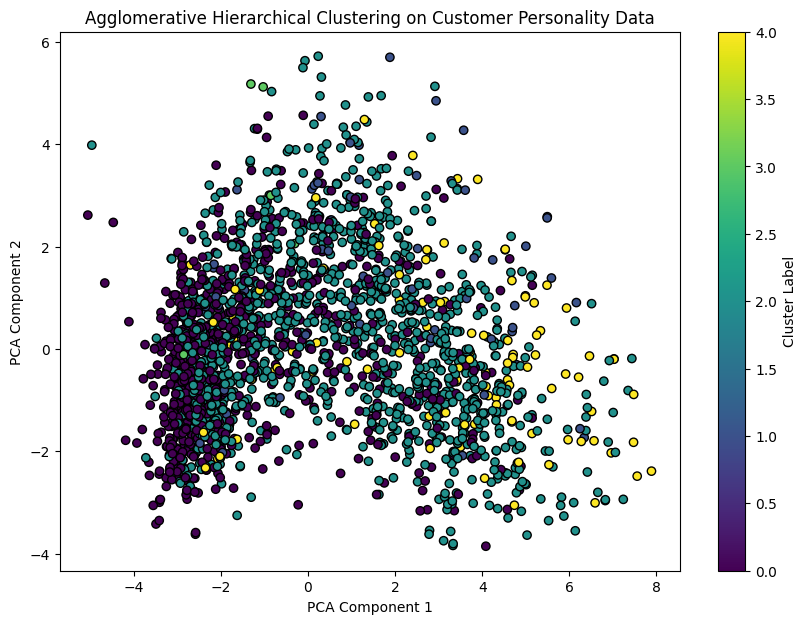

In [36]:
# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('Agglomerative Hierarchical Clustering on Customer Personality Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [37]:
# Step No.6 - Dendrogram Plot.

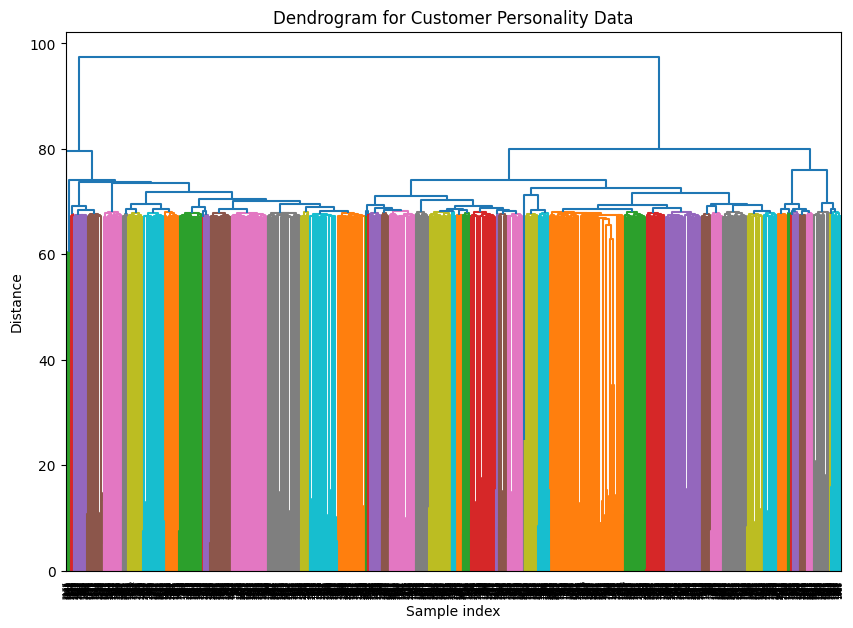

In [38]:
# Compute the linkage matrix
Z = linkage(scaled_data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Customer Personality Data')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
